**Modern Portfolio Theory (MPT)**

In [1]:
# !pip install empyrial

In [2]:
from empyrial import empyrial, Engine
import pandas as pd
import re

In [3]:
# From universe of stocks, categorize by beta(SPY,Xi) and Corr(SPY,Xi)
list_tickers = ['SPY', 'MSFT', 'AAPL', 'LMT', 'XOM', 'JNJ', 'KO', 'MCD', 'MRK', 'PM', 'TSM', 'TSLA', 'NFLX', 'BA', 'QQQ', 'SBUX']

In [4]:
date_today = pd.to_datetime('today').strftime("%Y-%m-%d")
date_2yrs_ago = pd.to_datetime(date_today) - pd.DateOffset(months=25)
date_2yrs_ago = date_2yrs_ago.strftime("%Y-%m-%d")
date_2yrs_ago

'2021-12-03'

In [5]:
portfolio = Engine(
    start_date = date_2yrs_ago,                                      
    portfolio = list_tickers,
    benchmark = ["SPY"],
    optimizer = "MINVAR", 
    rebalance = "monthly"
)

Start date: 2021-12-03
End date: 2024-01-03


,Backtest
,
Annual return,11.32%
Cumulative return,24.83%
Annual volatility,16.31 %
Winning day ratio,51.63%
Sharpe ratio,0.74
Calmar ratio,0.77
Information ratio,0.0
Stability,0.64
Max Drawdown,-14.66 %


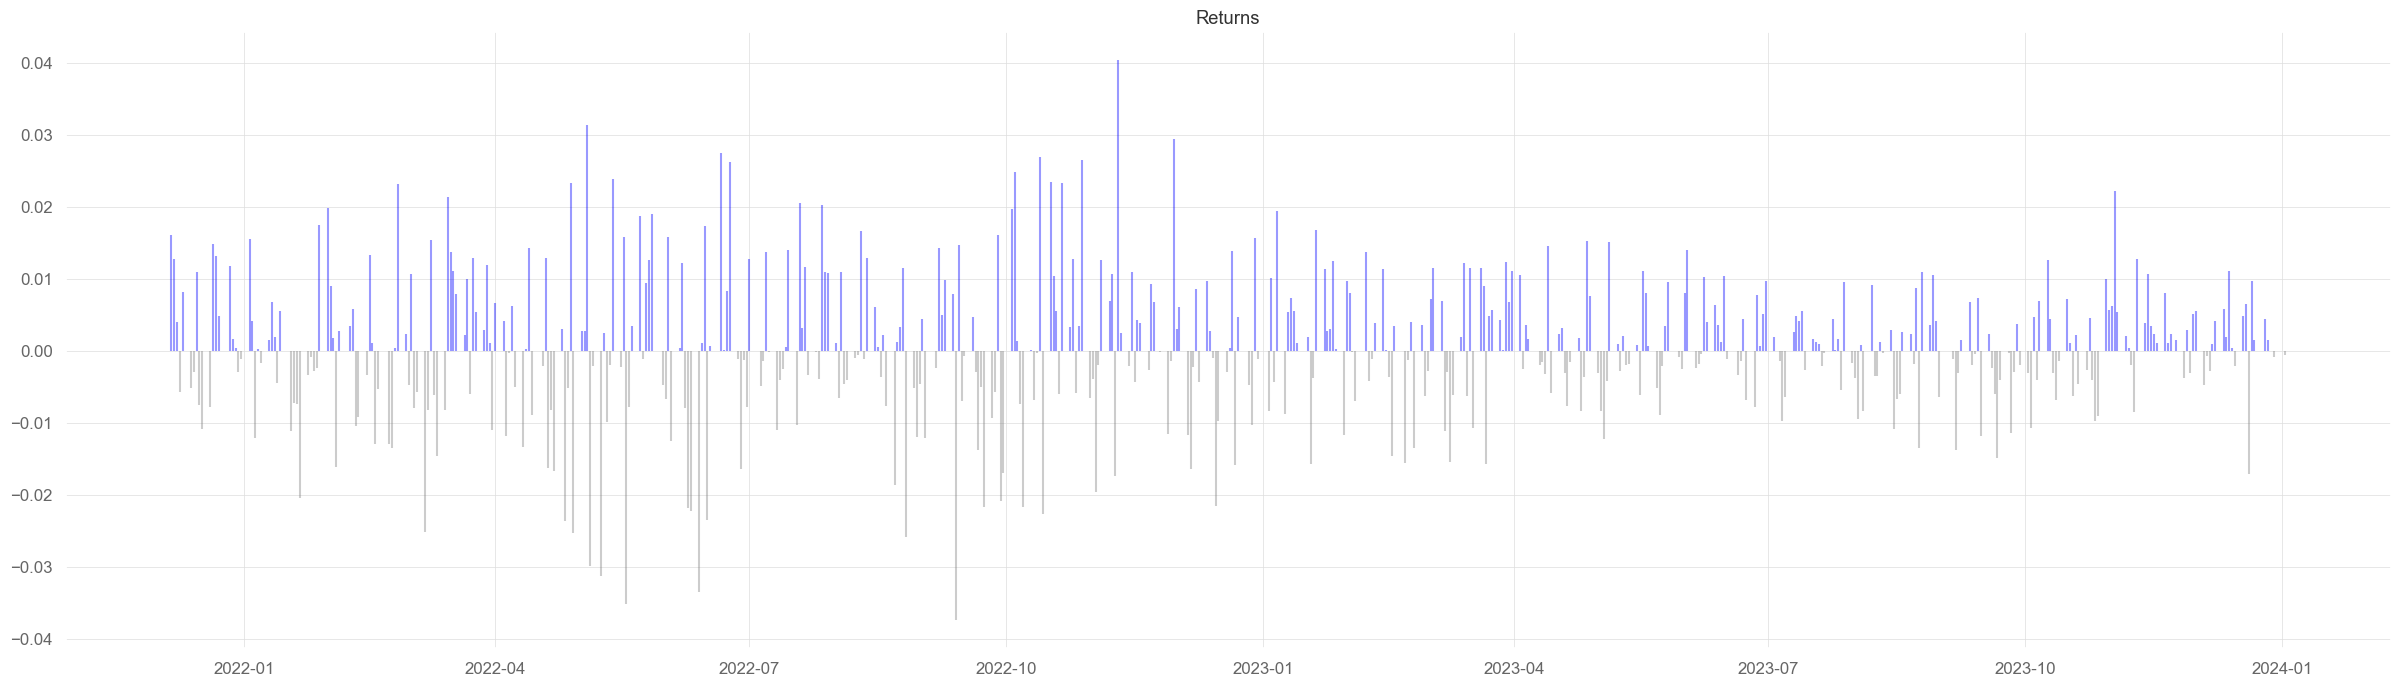

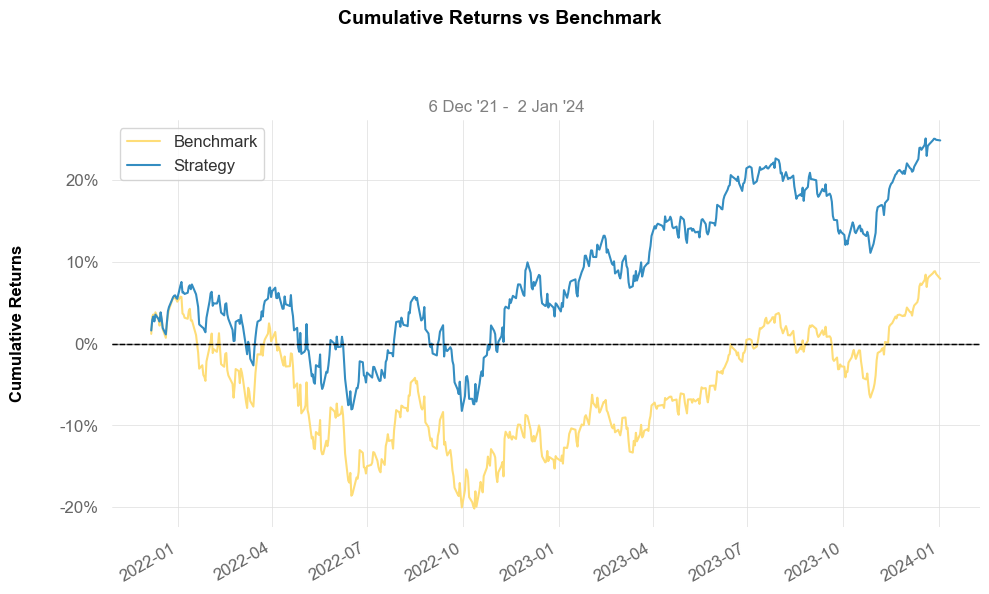

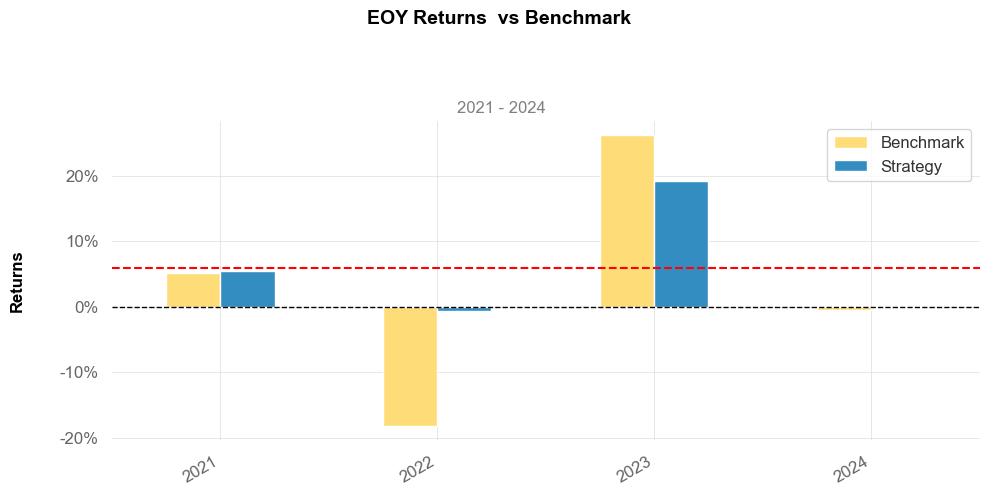

In [6]:
try:
    empyrial(portfolio)
except TypeError as e:
    pass 

# Summary of allocations

In [7]:
df_alloc = empyrial.orderbook
print("Hypothetical allocations over time: ")
df_alloc

Hypothetical allocations over time: 


,2022-01-02,2022-02-01,2022-03-04,2022-04-03,2022-05-04,2022-06-03,2022-07-03,2022-08-03,2022-09-02,2022-10-03,...,2023-05-04,2023-06-03,2023-07-03,2023-08-03,2023-09-02,2023-10-03,2023-11-02,2023-12-03,2024-01-02,2024-01-03
SPY,0.06254,0.06379,0.06225,0.06216,0.06215,0.06239,0.06213,0.06201,0.06185,0.06200,...,0.06197,0.06196,0.06203,0.06209,0.06219,0.06225,0.06228,0.06228,0.06232,0.06232
MSFT,0.05445,0.06129,0.05924,0.05686,0.05685,0.05701,0.05611,0.05549,0.05551,0.05592,...,0.05409,0.05445,0.05446,0.05473,0.05510,0.05541,0.05571,0.05591,0.05630,0.05630
AAPL,0.05131,0.05330,0.05428,0.05362,0.05329,0.04960,0.04909,0.05009,0.05036,0.05039,...,0.05018,0.05057,0.05100,0.05158,0.05183,0.05204,0.05262,0.05299,0.05345,0.05345
LMT,0.07312,0.07739,0.08006,0.08495,0.08589,0.08861,0.08843,0.08720,0.08579,0.08550,...,0.08191,0.08125,0.08073,0.08018,0.07990,0.07910,0.07841,0.07808,0.07775,0.07775
XOM,0.06466,0.06856,0.07098,0.08337,0.08129,0.08023,0.07780,0.07641,0.07716,0.07602,...,0.07226,0.07179,0.07184,0.07155,0.07151,0.07152,0.07131,0.07130,0.07109,0.07109
JNJ,0.07540,0.07817,0.07532,0.07929,0.07946,0.08507,0.08611,0.08603,0.08533,0.08584,...,0.08384,0.08334,0.08261,0.08207,0.08167,0.08114,0.08065,0.08006,0.07957,0.07957
KO,0.07255,0.07465,0.07616,0.07647,0.07775,0.07774,0.08014,0.08028,0.07933,0.07930,...,0.07856,0.07815,0.07775,0.07731,0.07703,0.07669,0.07620,0.07593,0.07557,0.07557
MCD,0.06898,0.07214,0.07282,0.07189,0.07229,0.07473,0.07734,0.07739,0.07697,0.07749,...,0.07757,0.07716,0.07656,0.07623,0.07592,0.07537,0.07508,0.07473,0.07445,0.07445
MRK,0.08224,0.08134,0.07739,0.08014,0.07962,0.08693,0.08624,0.08655,0.08564,0.08616,...,0.08434,0.08388,0.08310,0.08241,0.08162,0.08116,0.08114,0.08074,0.08026,0.08026
PM,0.07630,0.07752,0.07881,0.07351,0.07586,0.08304,0.08393,0.08284,0.08194,0.08071,...,0.07776,0.07744,0.07714,0.07668,0.07627,0.07577,0.07535,0.07510,0.07464,0.07464


In [8]:
print("Summary of the portfolio at the most recent date:") 
df_alloc_today = pd.DataFrame(df_alloc.iloc[:,-1])
df_alloc_today

Summary of the portfolio at the most recent date:


,2024-01-03
SPY,0.06232
MSFT,0.05630
AAPL,0.05345
LMT,0.07775
XOM,0.07109
JNJ,0.07957
KO,0.07557
MCD,0.07445
MRK,0.08026
PM,0.07464
